# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt("data/mnist_train_small.csv", delimiter=",")
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [3]:
labels_full = data[:, 0]
print(labels_full)
A_full = data[:, 1:].transpose()
labels_full.shape, A_full.shape

[6. 5. 7. ... 2. 9. 5.]


((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

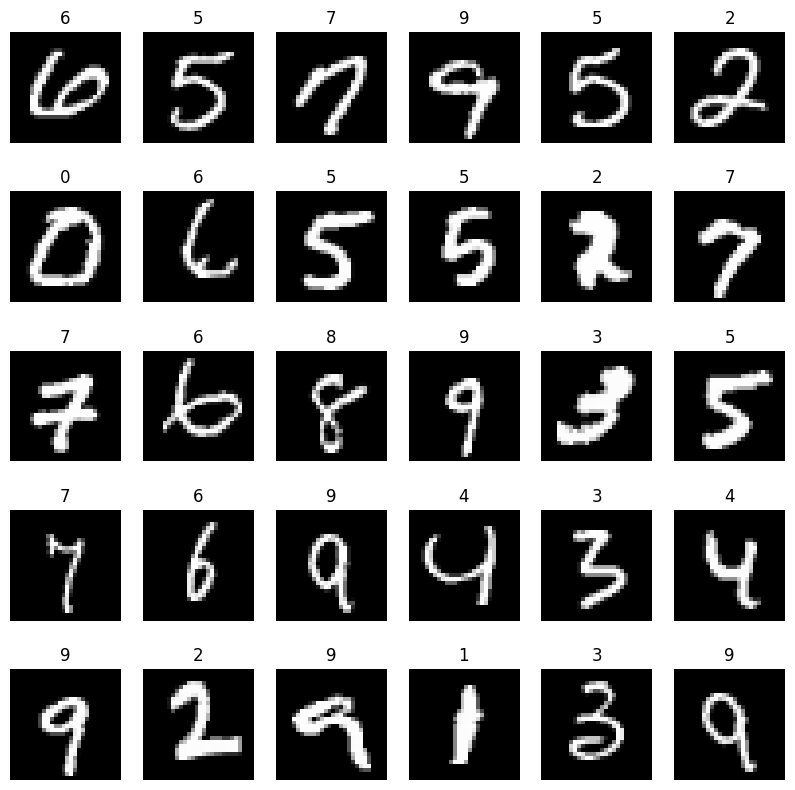

In [19]:
fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_full[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("%d" % labels_full[i])

Visualize the first 30 pictures corresponding the the digit "9"

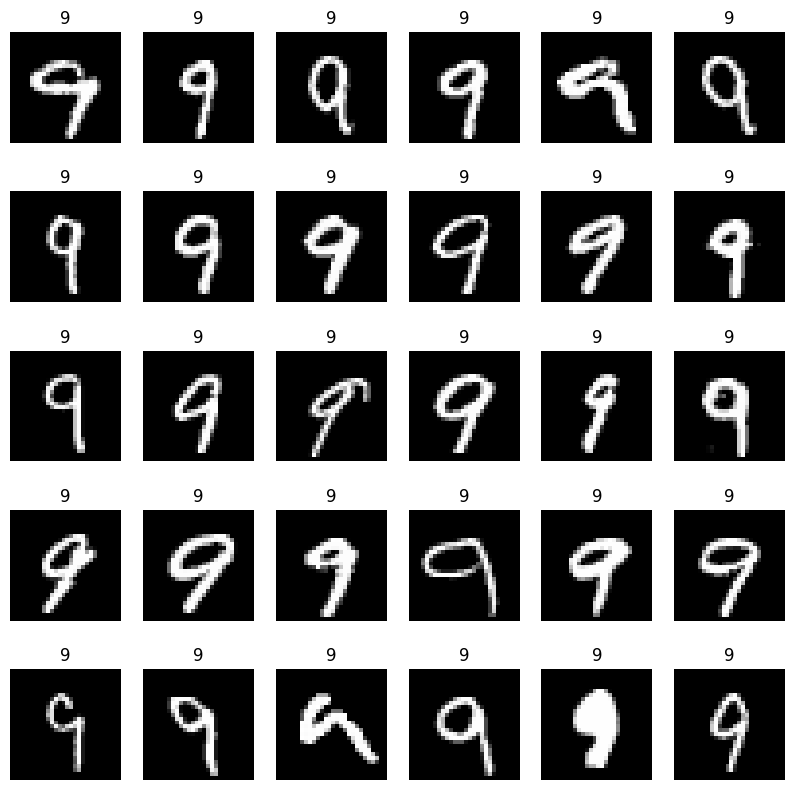

In [23]:
A_nine = A_full[:, labels_full == 9]

fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_nine[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("9")

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

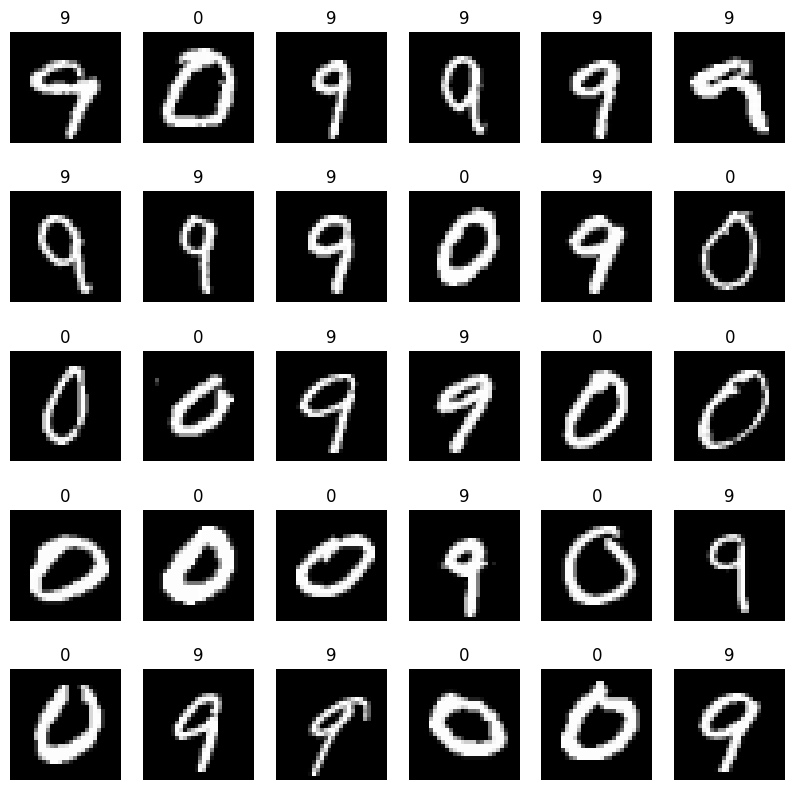

In [31]:
A_reduced = A_full[:, np.logical_or(labels_full == 0, labels_full == 9)]
labels_reduced = labels_full[np.logical_or(labels_full == 0, labels_full == 9)]

fig, axs = plt.subplots(5, 6, figsize=(10, 10))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(A_reduced[:, i], (28, 28)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("%d" % labels_reduced[i])

Plot the first 30 training images. 

Compute and visualize the average of the training data

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Visualize the first 30 principal axes

Compute the first two principal components corresponding to the first image

Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.